# Introduction

Notebook to aggregate the running of models in the context of traceability between **test cases** and **bug reports**.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

from modules.models_runner import tc_br_strat_runner
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd

import warnings; warnings.simplefilter('ignore')

testcases = fd.Datasets.read_testcases_df()
bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)
Features.shape: (19, 8)


# Run All Models

## Intersec Strategy

In [2]:
exp_vol_intersec_strat_runner = tc_br_strat_runner.TC_BR_Exp_Vol_Intersec_Strat_Runner()
exp_vol_intersec_strat_runner.execute()

evaluator_2 = exp_vol_intersec_strat_runner.get_evaluator() 
evals_df_2 = exp_vol_intersec_strat_runner.get_evals_df()

OracleExpertVolunteers_INTERSEC.shape: (195, 91)
TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
Running ZeroR model -----
OracleExpertVolunteers_INTERSEC.shape: (195, 91)
major_target_artifact: [13, 20, 14, 25, 24, 22, 21, 23, 19, 18, 17, 16, 15]
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 
Evaluating ZERO_R Model ----- 


### Results

In [3]:
evals_df_2.head()

,model,ref_name,perc_precision,perc_recall,perc_fscore,sim_threshold,top,trace_links_df
0,lsi,top_10_cosine_0.0,24.29,43.0,37.26,0.0,10.0,Bug_Number 1248267 1248268 1257087 1264988...
1,lsi,top_10_cosine_0.1,24.29,43.0,37.26,0.1,10.0,Bug_Number 1248267 1248268 1257087 1264988...
2,lsi,top_10_cosine_0.2,24.37,43.0,37.29,0.2,10.0,Bug_Number 1248267 1248268 1257087 1264988...
3,lsi,top_10_cosine_0.3,24.39,43.0,37.31,0.3,10.0,Bug_Number 1248267 1248268 1257087 1264988...
4,lsi,top_10_cosine_0.4,24.45,43.0,37.33,0.4,10.0,Bug_Number 1248267 1248268 1257087 1264988...


In [4]:
evals_df_2_1 = evals_df_2[evals_df_2.top != 19.0]
aux_functions.highlight_df( evals_df_2_1[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

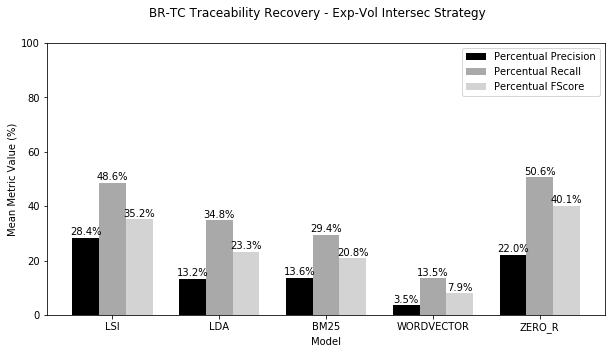

In [5]:
evaluator_2.plot_evaluations_3(evals_df_2, title='BR-TC Traceability Recovery - Exp-Vol Intersec Strategy')

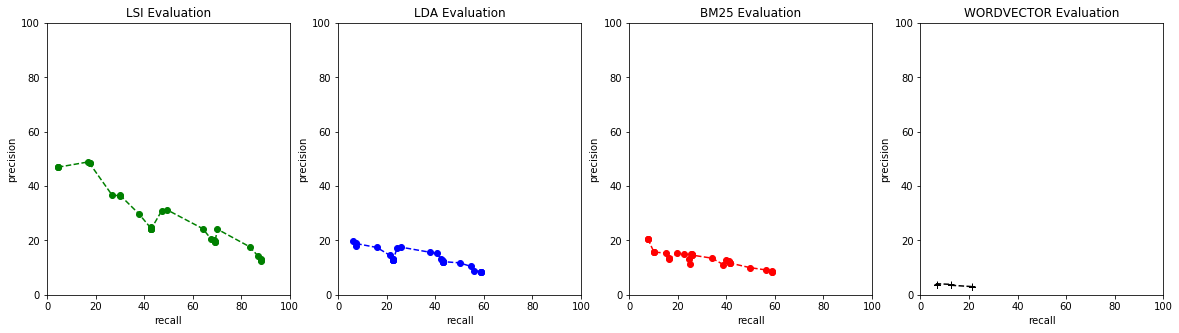

In [6]:
evaluator_2.plot_evaluations_4(evals_df_2)

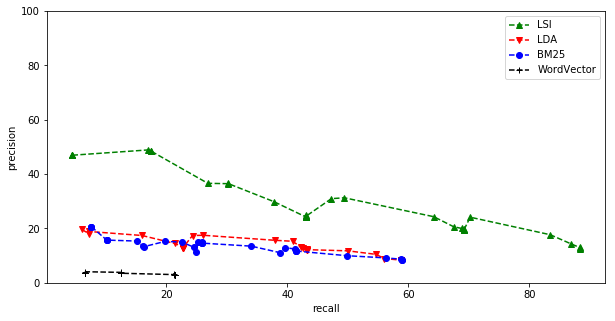

In [7]:
evaluator_2.plot_evaluations_5(evals_df_2)

**Similarity Threshold Variation Analysis**

LSI

In [8]:
evaluator_2.plot_evaluations_2_2('LSI Model', evals_df_2, 'lsi')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f4a27c17488> (for post_execute):


ValueError: Invalid RGBA argument: 'dark-gray'

ValueError: Invalid RGBA argument: 'dark-gray'

<Figure size 1800x360 with 3 Axes>

LDA

In [9]:
evaluator_2.plot_evaluations_2_2('LDA Model', evals_df_2, 'lda')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f4a27c17488> (for post_execute):


ValueError: Invalid RGBA argument: 'dark-gray'

ValueError: Invalid RGBA argument: 'dark-gray'

<Figure size 1800x360 with 3 Axes>

BM25

In [10]:
evaluator_2.plot_evaluations_2_2('BM25 Model', evals_df_2, 'bm25')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f4a27c17488> (for post_execute):


ValueError: Invalid RGBA argument: 'dark-gray'

ValueError: Invalid RGBA argument: 'dark-gray'

<Figure size 1800x360 with 3 Axes>

Word Vector

In [11]:
evaluator_2.plot_evaluations_2_2('Word Vector Model', evals_df_2, 'wordvector')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f4a27c17488> (for post_execute):


ValueError: Invalid RGBA argument: 'dark-gray'

ValueError: Invalid RGBA argument: 'dark-gray'

<Figure size 1800x360 with 3 Axes>

### Oracle True Traces

In [12]:
oracle_true_traces_inter = aux_functions.get_oracle_true_positives(exp_vol_intersec_strat_runner)
print('len(oracle_true_traces_inter): {}'.format(len(oracle_true_traces_inter)))

len(oracle_true_traces_inter): 514


#### Oracle

In [13]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_evaluator().get_oracle_df().iloc[0:13,0:12])

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120
TC_Number,,,,,,,,,,,,
13,0,0,0,1,0,0,0,0,0,0,0,1
14,0,0,0,1,0,0,0,0,0,0,0,1
15,0,0,0,1,0,0,0,0,0,0,0,1
16,0,0,0,1,0,0,0,0,0,0,0,1
17,0,0,0,1,0,0,0,0,0,0,0,1
18,0,0,0,1,0,0,0,0,0,0,0,1
19,0,0,0,1,0,0,0,0,0,0,0,1
20,0,0,0,1,0,0,0,0,0,0,0,1
21,0,0,0,1,0,0,0,0,0,0,0,1


#### Similarity Matrices Analysis

##### **LDA**

In [14]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix().iloc[0:13,0:12])

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120
TC_Number,,,,,,,,,,,,
13,0.126582,0.105046,0.276218,0.22171,0.827142,0.372933,0.14325,0.123384,0.819053,0.408286,0.443309,0.102148
14,0.317495,0.252128,0.303893,0.168187,0.972023,0.304656,0.0811337,0.0843016,0.712927,0.442561,0.380634,0.0747255
15,0.10915,0.101071,0.240433,0.171051,0.835602,0.342379,0.0632099,0.0570443,0.827263,0.408751,0.428924,0.0583721
16,0.113487,0.106775,0.235548,0.170323,0.792168,0.328413,0.0705145,0.0630786,0.784869,0.395096,0.410971,0.0649968
17,0.110505,0.107775,0.205606,0.154007,0.640207,0.27384,0.0770546,0.0689241,0.635923,0.333385,0.342051,0.0710241
18,0.107986,0.0996728,0.239316,0.169901,0.835118,0.341577,0.061981,0.0558662,0.826647,0.407704,0.427938,0.0572224
19,0.127082,0.106098,0.243428,0.222032,0.83314,0.343243,0.068161,0.0907269,0.825126,0.411226,0.446467,0.0903102
20,0.105766,0.0970041,0.237182,0.167706,0.83418,0.340041,0.0596365,0.0536186,0.825457,0.405702,0.426048,0.0550287
21,0.103972,0.0948488,0.235455,0.165932,0.833409,0.338796,0.0577433,0.0518037,0.824483,0.404079,0.424516,0.0532573


##### **LSI**

In [15]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix().iloc[0:13,0:12])

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120
TC_Number,,,,,,,,,,,,
13,0.160448,0.19947,0.46343,0.699438,0.45909,0.398544,0.179677,0.375838,0.499973,0.385456,0.405358,0.217433
14,0.175316,0.19331,0.514992,0.723357,0.388498,0.34792,0.176904,0.307352,0.387626,0.248639,0.399613,0.19491
15,0.0816225,0.114636,0.436492,0.73919,0.409831,0.263488,0.265879,0.232089,0.412656,0.292841,0.306022,0.128264
16,0.168325,0.14874,0.505352,0.702639,0.373976,0.337684,0.234899,0.282048,0.363812,0.289344,0.370027,0.157867
17,0.195552,0.153213,0.539847,0.59279,0.393716,0.374408,0.644246,0.294487,0.381735,0.501938,0.412678,0.205013
18,0.066099,0.10513,0.408605,0.679167,0.413414,0.316088,0.187777,0.282792,0.440803,0.301647,0.326549,0.158008
19,0.118581,0.155334,0.468565,0.649821,0.581196,0.41066,0.270597,0.334473,0.513909,0.448956,0.385948,0.21856
20,0.101477,0.15062,0.448701,0.575802,0.661463,0.374579,0.254352,0.306973,0.503445,0.424996,0.320481,0.184637
21,0.103599,0.153518,0.458583,0.6023,0.633237,0.367574,0.251237,0.298102,0.499632,0.410142,0.326667,0.175842


##### **BM25**

In [16]:
#aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix())

##### **Word Vector**

In [17]:
import numpy as np

wv_sim_matrix = exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix()

wv_sim_values = []
for idx,row in wv_sim_matrix.iterrows():
    for col in wv_sim_matrix.columns:
        wv_sim_values.append(wv_sim_matrix.at[idx,col])

print("Mean Similarity Value: {}".format(np.mean(wv_sim_values)))
print("Std Similarity Value: {}".format(np.std(wv_sim_values)))

#aux_functions.highlight_df(wv_sim_matrix)

Mean Similarity Value: 0.9070996796178279
Std Similarity Value: 0.03517528954815485


#### LDA Topics

In [18]:
exp_vol_intersec_strat_runner.get_lda_model().print_topics()

Topic #0: custom tab video toolbar link control drop item devic open
Topic #1: choos question display toolbar content ani close bookmark bar remov
Topic #2: widevin webm eme video support start load choos play web
Topic #3: download dropmak panel file click open item folder button icon
Topic #4: choos question display toolbar content ani close bookmark bar remov
Topic #5: pdf consol file browser theme child mode select use viewer
Topic #6: scroll mous apz make true sure config async wireless wire
Topic #7: icon awesom reader narrat speech bar display correctli mode text
Topic #8: choos question display toolbar content ani close bookmark bar remov
Topic #9: choos question display toolbar content ani close bookmark bar remov
Topic #10: bookmark toolbar desktop option warn work expect avail button tri
Topic #11: context menu page imag bring link option thi question open
Topic #12: text select field previou ha anoth differ keyboard left default
Topic #13: zoom indic bar locat key page disp

### ZeroR Evaluation

In [19]:
df = exp_vol_intersec_strat_runner.get_zeror_model().get_major_counts_df().iloc[0:20,:]
df.rename(columns={0:'TC ID',1:'num_BRs'})

,TC ID,num_BRs
0,13,20
7,20,20
1,14,20
12,25,20
11,24,20
9,22,20
8,21,20
10,23,20
6,19,20
5,18,20


In [20]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_zeror_model().get_sim_matrix().iloc[0:20,:])

### Retrieved Traces - Similarity Threshold 0.0

In [21]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_vol_intersec_strat_runner.get_oracle(), evals_df=evals_df_2, top_values=[10,20,40], sim_threshs=[0.0])

#### Traces Not Captured by Any Technique

In [22]:
print('TOP 10 --------------------------')
all_captured_traces_t10_inter = aux_functions.get_captured_traces_union(top_value=10, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t10_inter = oracle_true_traces_inter - all_captured_traces_t10_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t10_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t10_inter), len(oracle_true_traces_inter), len(not_captured_traces_t10_inter)/len(oracle_true_traces_inter)*100))

details_df_t10 = aux_functions.detail_features_tc_br(not_captured_traces_t10_inter, testcases, bugreports)
display(details_df_t10.groupby('tc_feat').count())

print('\n\nTOP 20 --------------------------')
all_captured_traces_t20_inter = aux_functions.get_captured_traces_union(top_value=20, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t20_inter = oracle_true_traces_inter - all_captured_traces_t20_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t20_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t20_inter), len(oracle_true_traces_inter), len(not_captured_traces_t20_inter)/len(oracle_true_traces_inter)*100))

details_df_t20 = aux_functions.detail_features_tc_br(not_captured_traces_t20_inter, testcases, bugreports)
display(details_df_t20.groupby('tc_feat').count())

print('\n\nTOP 40 --------------------------')
all_captured_traces_t40_inter = aux_functions.get_captured_traces_union(top_value=40, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t40_inter = oracle_true_traces_inter - all_captured_traces_t40_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t40_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t40_inter), len(oracle_true_traces_inter), len(not_captured_traces_t40_inter)/len(oracle_true_traces_inter)*100))

details_df_t40 = aux_functions.detail_features_tc_br(not_captured_traces_t40_inter, testcases, bugreports)
display(details_df_t40.groupby('tc_feat').count())

TOP 10 --------------------------
len(not_captured_traces): 203
percent not_captured_traces: 203/514 * 100 : 39.49%


,tc,br,br_summary
tc_feat,,,
Browser Customization,5,5,5
Context Menu,58,58,58
Downloads Dropmaker,20,20,20
Indicator for device permissions,11,11,11
New Awesome Bar,101,101,101
PDF Viewer,1,1,1
Zoom Indicator,7,7,7




TOP 20 --------------------------
len(not_captured_traces): 108
percent not_captured_traces: 108/514 * 100 : 21.01%


,tc,br,br_summary
tc_feat,,,
Browser Customization,4,4,4
Context Menu,27,27,27
Downloads Dropmaker,10,10,10
Indicator for device permissions,3,3,3
New Awesome Bar,64,64,64




TOP 40 --------------------------
len(not_captured_traces): 36
percent not_captured_traces: 36/514 * 100 : 7.004%


,tc,br,br_summary
tc_feat,,,
Context Menu,4,4,4
Downloads Dropmaker,4,4,4
New Awesome Bar,28,28,28


##### Missed Traces Detailed

TOP 10

In [23]:
import pandas as pd

lda_model = exp_vol_intersec_strat_runner.get_lda_model()
lsi_model = exp_vol_intersec_strat_runner.get_lsi_model()
bm25_model = exp_vol_intersec_strat_runner.get_bm25_model()

df = pd.DataFrame(columns=['mrw_tcs','mrw_brs'], index=['lda_t10','lsi_t10','bm25_t10',
                                                        'lda_t20','lsi_t20','bm25_t20',
                                                        'lda_t40','lsi_t40','bm25_t40'])

lda_mrw_tc_t10, lda_mrw_br_t10 = aux_functions.get_mrw_traces_set(not_captured_traces_t10_inter, lda_model)
lda_mrw_tc_t20, lda_mrw_br_t20 = aux_functions.get_mrw_traces_set(not_captured_traces_t20_inter, lda_model)
lda_mrw_tc_t40, lda_mrw_br_t40 = aux_functions.get_mrw_traces_set(not_captured_traces_t40_inter, lda_model)

lsi_mrw_tc_t10, lsi_mrw_br_t10 = aux_functions.get_mrw_traces_set(not_captured_traces_t10_inter, lsi_model)
lsi_mrw_tc_t20, lsi_mrw_br_t20 = aux_functions.get_mrw_traces_set(not_captured_traces_t20_inter, lsi_model)
lsi_mrw_tc_t40, lsi_mrw_br_t40 = aux_functions.get_mrw_traces_set(not_captured_traces_t40_inter, lsi_model)

bm25_mrw_tc_t10, bm25_mrw_br_t10 = aux_functions.get_mrw_traces_set(not_captured_traces_t10_inter, bm25_model)
bm25_mrw_tc_t20, bm25_mrw_br_t20 = aux_functions.get_mrw_traces_set(not_captured_traces_t20_inter, bm25_model)
bm25_mrw_tc_t40, bm25_mrw_br_t40 = aux_functions.get_mrw_traces_set(not_captured_traces_t40_inter, bm25_model)

df.at['lda_t10','mrw_tcs'] = lda_mrw_tc_t10
df.at['lda_t10','mrw_brs'] = lda_mrw_br_t10
df.at['lda_t20','mrw_tcs'] = lda_mrw_tc_t20
df.at['lda_t20','mrw_brs'] = lda_mrw_br_t20
df.at['lda_t40','mrw_tcs'] = lda_mrw_tc_t40
df.at['lda_t40','mrw_brs'] = lda_mrw_br_t40


df.at['lsi_t10','mrw_tcs'] = lsi_mrw_tc_t10
df.at['lsi_t10','mrw_brs'] = lsi_mrw_br_t10
df.at['lsi_t20','mrw_tcs'] = lsi_mrw_tc_t20
df.at['lsi_t20','mrw_brs'] = lsi_mrw_br_t20
df.at['lsi_t40','mrw_tcs'] = lsi_mrw_tc_t40
df.at['lsi_t40','mrw_brs'] = lsi_mrw_br_t40

df.at['bm25_t10','mrw_tcs'] = bm25_mrw_tc_t10
df.at['bm25_t10','mrw_brs'] = bm25_mrw_br_t10
df.at['bm25_t20','mrw_tcs'] = bm25_mrw_tc_t20
df.at['bm25_t20','mrw_brs'] = bm25_mrw_br_t20
df.at['bm25_t40','mrw_tcs'] = bm25_mrw_tc_t40
df.at['bm25_t40','mrw_brs'] = bm25_mrw_br_t40

display(df[df.index.str.contains('lda')])
display(df[df.index.str.contains('lsi')])
display(df[df.index.str.contains('bm25')])

,mrw_tcs,mrw_brs
lda_t10,"[(awesom, 92), (bar, 75), (icon, 69), (display, 67), (menu, 60), (context, 58)]","[(tab, 75), (search, 43), (context, 38), (nan, 37), (file, 37), (step, 36)]"
lda_t20,"[(awesom, 59), (bar, 45), (icon, 42), (display, 41), (site, 28), (context, 27)]","[(tab, 46), (file, 31), (step, 25), (list, 24), (open, 23), (new, 21)]"
lda_t40,"[(awesom, 26), (bar, 19), (display, 16), (icon, 15), (search, 12), (site, 11)]","[(open, 21), (tab, 17), (step, 15), (file, 13), (window, 12), (creat, 12)]"


,mrw_tcs,mrw_brs
lsi_t10,"[(awesome, 92), (bar, 69), (icon, 68), (menu, 60), (context, 58), (site, 47)]","[(result, 92), (tab, 75), (new, 45), (search, 43), (context, 38), (file, 37)]"
lsi_t20,"[(awesome, 59), (icon, 41), (bar, 40), (site, 28), (context, 27), (menu, 27)]","[(tab, 46), (result, 34), (new, 32), (file, 31), (step, 24), (window, 24)]"
lsi_t40,"[(awesome, 26), (bar, 16), (icon, 15), (site, 11), (search, 9), (ensure, 9)]","[(window, 21), (tab, 17), (switch, 16), (step, 15), (new, 14), (file, 13)]"


,mrw_tcs,mrw_brs
bm25_t10,"[(bar, 113), (display, 99), (open, 95), (page, 87), (click, 77), (launch, 77)]","[(firefox, 191), (open, 145), (bar, 86), (tab, 75), (new, 57), (click, 43)]"
bm25_t20,"[(bar, 66), (display, 60), (open, 47), (icon, 42), (click, 39), (page, 39)]","[(firefox, 97), (open, 82), (bar, 49), (tab, 46), (new, 37), (window, 24)]"
bm25_t40,"[(bar, 28), (display, 25), (icon, 15), (click, 12), (awesom, 12), (http, 11)]","[(open, 29), (firefox, 27), (window, 21), (tab, 17), (click, 16), (new, 14)]"


In [24]:
nab_feat_num = features[features.feat_name == 'new_awesome_bar'].Feature_Number.values[0]
nab_tcs_nums = testcases[testcases.Feature_ID == nab_feat_num].TC_Number.values
print(nab_tcs_nums)
nab_brs_list = [br for tc,br in not_captured_traces_t10_inter if tc in nab_tcs_nums]
print(nab_brs_list)
print(len(nab_brs_list))

[13 14 15 16 17 18 19 20 21 22 23 24 25]
[1276120, 1296366, 1296366, 1293308, 1276120, 1365887, 1276120, 1294733, 1365887, 1365887, 1365887, 1279143, 1279864, 1279143, 1296366, 1301421, 1279864, 1296366, 1279143, 1279864, 1296366, 1297374, 1334844, 1297976, 1293308, 1276120, 1365887, 1276120, 1276120, 1296366, 1297374, 1337682, 1279143, 1276120, 1276120, 1293308, 1264988, 1339497, 1279143, 1279864, 1279143, 1279864, 1293308, 1301421, 1357458, 1365887, 1264988, 1352539, 1337682, 1339497, 1279864, 1365887, 1352539, 1339497, 1264988, 1311998, 1297976, 1353831, 1294733, 1293308, 1276120, 1279864, 1293308, 1334844, 1293308, 1311998, 1337682, 1276120, 1337682, 1365887, 1365887, 1279143, 1279143, 1296366, 1279143, 1296366, 1365887, 1365887, 1276120, 1297976, 1297976, 1293308, 1365887, 1301421, 1293308, 1337682, 1296366, 1279143, 1353831, 1335992, 1339497, 1279143, 1337682, 1293308, 1297976, 1279143, 1339497, 1293308, 1276120, 1337682, 1337682]
101


**LDA Model**

In [25]:
aux_functions.rank_tc_br_matrix([nab_brs_list[0]], exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix(), 10)

Bug_Number,1276120
TC_Number,
23,0.760318
71,0.661510
103,0.657655
128,0.743029
174,0.911257
175,0.904208
176,0.883837
177,0.907924
178,0.908496


In [26]:
aux_functions.rank_tc_br_matrix([nab_brs_list[-1]], exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix(), 10)

Bug_Number,1337682
TC_Number,
144,0.830945
145,0.829869
148,0.831231
149,0.829658
150,0.829575
151,0.829270
200,0.831103
201,0.831953
202,0.830342


In [27]:
docs_feats = exp_vol_intersec_strat_runner.get_lda_model().docs_feats_df
docs_feats[docs_feats.index.isin(list(range(13,26)) + [nab_brs_list[0]] + [nab_brs_list[-1]])]

,mrw,dl
13,"[awesom, bar, state, search, set, launch]",24
14,"[drop, search, ensur, url, awesom, link]",62
15,"[search, display, indic, awesom, ensur, bar]",27
16,"[search, ensur, awesom, link, drop, display]",34
17,"[tab, devic, ensur, link, icon, display]",54
18,"[awesom, bar, url, state, correctli, search]",23
19,"[icon, awesom, bar, display, support, left]",22
20,"[lock, icon, site, http, awesom, display]",38
21,"[icon, site, lock, awesom, display, bar]",35
22,"[inform, icon, bar, awesom, left, site]",32


**LSI**

In [28]:
aux_functions.rank_tc_br_matrix([nab_brs_list[0]], exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix(), 10)

Bug_Number,1276120
TC_Number,
36,0.513943
62,0.563678
104,0.730410
105,0.825455
106,0.851183
107,0.713317
108,0.751513
109,0.771806
126,0.526016


In [29]:
aux_functions.rank_tc_br_matrix([nab_brs_list[-1]], exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix(), 10)

Bug_Number,1337682
TC_Number,
13,0.568361
17,0.586490
19,0.549558
25,0.641233
29,0.608993
65,0.563242
85,0.549779
180,0.544958
193,0.537310


**BM25**

In [30]:
aux_functions.rank_tc_br_matrix([nab_brs_list[0]], exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix(), 10)

Bug_Number,1276120
TC_Number,
27,0.572981
29,0.595692
58,0.703779
109,0.612983
127,1.000000
128,0.907113
134,0.646288
137,0.665190
163,0.597703


In [31]:
aux_functions.rank_tc_br_matrix([nab_brs_list[-1]], exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix(), 10)

Bug_Number,1337682
TC_Number,
14,0.875145
65,0.786647
98,0.770917
127,0.829445
128,0.945695
147,0.764311
148,0.905199
198,0.761990
204,1.000000


**Word Vector**

In [32]:
aux_functions.rank_tc_br_matrix([nab_brs_list[0]], exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix(), 10)

Bug_Number,1276120
TC_Number,
28,0.949352
29,0.950061
33,0.947904
37,0.948410
38,0.949037
107,0.951170
132,0.948444
135,0.947790
137,0.949211


In [33]:
aux_functions.rank_tc_br_matrix([nab_brs_list[-1]], exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix(), 10)

Bug_Number,1337682
TC_Number,
29,0.956374
94,0.951758
100,0.952099
115,0.951525
127,0.957061
128,0.951633
131,0.954614
135,0.955187
183,0.957298


TOP 40

In [34]:
aux_functions.detail_features_tc_br(not_captured_traces_t40_inter, testcases=testcases, bugreports=bugreports).sort_values(by='tc')

,tc,tc_feat,br,br_summary
1,13,New Awesome Bar,1276120,Autocomplete suggestions just don't go away after Win+Down
23,13,New Awesome Bar,1279143,"color indicator missing when ""File -> New Container Tab"" without any windows opened"
4,14,New Awesome Bar,1276120,Autocomplete suggestions just don't go away after Win+Down
34,15,New Awesome Bar,1296366,"Ctrl+Click awesomebar entry with ""Switch to Tab"" doesn't open new tab"
14,15,New Awesome Bar,1279143,"color indicator missing when ""File -> New Container Tab"" without any windows opened"
9,15,New Awesome Bar,1276120,Autocomplete suggestions just don't go away after Win+Down
15,16,New Awesome Bar,1296366,"Ctrl+Click awesomebar entry with ""Switch to Tab"" doesn't open new tab"
35,16,New Awesome Bar,1279143,"color indicator missing when ""File -> New Container Tab"" without any windows opened"
27,16,New Awesome Bar,1276120,Autocomplete suggestions just don't go away after Win+Down
19,17,New Awesome Bar,1293308,System font setting respected by location bar but ignored by location bar's autocomplete drop-down list


The listed traces (not recovered) are related to seven bug reports. The analysis of each one of them follows:

* BR_1276720 (New Awesome Bar): the description doesn't help, there is no relevant keywords in the content. The reporter used some words incorrectly, such as "searchbar" and "urlbar, which difficult the techniques task. 
* BR_1279143 (New Awesome Bar): the description contains the word "awesomebar" written incorrectly. The presence of incorrect words requires the use of complementary techniques to detect and correct these mistakes before the query (bug report) be submitted to the technique, so a relevant result may be returned. 
* BR_1296366 (New Awesome Bar): the bug description is very brief and the title contains the word "awesomebar", also written incorrecly, such as in the previous bug;
* BR_1293308 (New Awesome Bar): the bug reporter provided a technical description and used technical words, such as "urlbar", and a synonym "location bar", both not used in the test cases descriptions;
* BR_1270983 (Context Menu): this bug was probably reported automatically as result of automatic test failure. Despite the presence of the word "contextmenu" in the title, the technique were not able to link it with the test cases of this system feature. This may happened due to the writting, again "incorrect" into the bug description.
* BR_1299458 (Context Menu): this bug report is very well written, in fact citing the keyword "context menu" two times. We estimate the reason for not recovering the trace involving it is the slightly smaller size of the corresponding test case.
* BR_1432915 (Downloads Dropmaker): this bug report lacks important fields, such as the steps to reproduce and expected results. The reporter provided a very short description about a technical issue while downloading files. Despite the presence of the keyword "downloading", the techniques were not able to link this bug report with the test cases that have a shorter description.

In [35]:
aux_functions.rank_tc_br_matrix([1299458], exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix(), 40)

Bug_Number,1299458
TC_Number,
13,0.812498
14,0.842698
15,0.778643
16,0.841739
17,0.731509
18,0.779094
19,0.618421
20,0.490498
21,0.535217


#### Traces Captured by Every Technique

In [36]:
print('TOP 10 -----------------------')
traces_captured_by_all_t10_inter = aux_functions.get_captured_traces_intersec(10, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t10_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t10_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t10_inter)/len(oracle_true_traces_inter) *100))

details_df_t10 = aux_functions.detail_features_tc_br(traces_captured_by_all_t10_inter, testcases, bugreports)
display(details_df_t10.groupby('tc_feat').count())

print('\n\nTOP 20 -----------------------')
traces_captured_by_all_t20_inter = aux_functions.get_captured_traces_intersec(20, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t20_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t20_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t20_inter)/len(oracle_true_traces_inter) *100))

details_df_t20 = aux_functions.detail_features_tc_br(traces_captured_by_all_t20_inter, testcases, bugreports)
display(details_df_t20.groupby('tc_feat').count())

print('\n\nTOP 40 -----------------------')
traces_captured_by_all_t40_inter = aux_functions.get_captured_traces_intersec(40, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t40_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t40_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t40_inter)/len(oracle_true_traces_inter) *100))

details_df_t40 = aux_functions.detail_features_tc_br(traces_captured_by_all_t40_inter, testcases, bugreports)
display(details_df_t40.groupby('tc_feat').count())

TOP 10 -----------------------
len(traces_captured_by_all): 6
percent traces_captured_by_all: 6/514 * 100 : 1.167%


,tc,br,br_summary
tc_feat,,,
Context Menu,3,3,3
Indicator for device permissions,1,1,1
New Awesome Bar,2,2,2




TOP 20 -----------------------
len(traces_captured_by_all): 27
percent traces_captured_by_all: 27/514 * 100 : 5.253%


,tc,br,br_summary
tc_feat,,,
Browser Customization,1,1,1
Context Menu,5,5,5
Downloads Dropmaker,6,6,6
Indicator for device permissions,6,6,6
New Awesome Bar,6,6,6
Zoom Indicator,3,3,3




TOP 40 -----------------------
len(traces_captured_by_all): 70
percent traces_captured_by_all: 70/514 * 100 : 13.62%


,tc,br,br_summary
tc_feat,,,
Browser Customization,1,1,1
Context Menu,27,27,27
Downloads Dropmaker,13,13,13
Indicator for device permissions,12,12,12
New Awesome Bar,9,9,9
Zoom Indicator,8,8,8


#### Techniques Evaluation

In [37]:
retrieved_traces_df[['top','sim_thresh','model','num_TP','num_FP','num_FN','precision','recall','fscore']].head(50)

,top,sim_thresh,model,num_TP,num_FP,num_FN,precision,recall,fscore
0,10,0.0,lsi,221,689,293,24.29,43.00,37.26
3,10,0.0,lda,116,794,398,12.75,22.57,19.55
6,10,0.0,bm25,133,778,381,14.60,25.88,22.41
9,10,0.0,wordvector,34,876,480,3.74,6.61,5.73
1,20,0.0,lsi,356,1464,158,19.56,69.26,45.92
4,20,0.0,lda,224,1596,290,12.31,43.58,28.90
7,20,0.0,bm25,213,1609,301,11.69,41.44,27.46
10,20,0.0,wordvector,64,1756,450,3.52,12.45,8.26
2,40,0.0,lsi,454,3186,60,12.47,88.33,39.85
5,40,0.0,lda,301,3339,213,8.27,58.56,26.42


#### True Positives Analysis

In [38]:
bm25_tp_set_t10, lsi_tp_set_t10, lda_tp_set_t10, wv_tp_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'TP')
bm25_tp_set_t20, lsi_tp_set_t20, lda_tp_set_t20, wv_tp_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'TP')
bm25_tp_set_t40, lsi_tp_set_t40, lda_tp_set_t40, wv_tp_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'TP')
#aux_functions.plot_venn_diagrams(TOP, bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, 'True Positives')

##### Exclusive Traces

In [39]:
import pandas as pd

print("TOP 10 ------------------------------")
bm25_tp_exc_set_t10, lsi_tp_exc_set_t10, lda_tp_exc_set_t10, wv_tp_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_tp_set_t10, lsi_tp_set_t10, lda_tp_set_t10, wv_tp_set_t10, traces_type='TP')

print("\n\nTOP 20 ------------------------------")
bm25_tp_exc_set_t20, lsi_tp_exc_set_t20, lda_tp_exc_set_t20, wv_tp_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_tp_set_t20, lsi_tp_set_t20, lda_tp_set_t20, wv_tp_set_t20, traces_type='TP')

print("\n\nTOP 40 -------------------------------")
bm25_tp_exc_set_t40, lsi_tp_exc_set_t40, lda_tp_exc_set_t40, wv_tp_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_tp_set_t40, lsi_tp_set_t40, lda_tp_set_t40, wv_tp_set_t40, traces_type='TP')

df = pd.DataFrame(index=['TOP 10', 'TOP 20', 'TOP 40'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 10','BM25'] = len(bm25_tp_exc_set_t10)
df.at['TOP 20','BM25'] = len(bm25_tp_exc_set_t20)
df.at['TOP 40','BM25'] = len(bm25_tp_exc_set_t40)

df.at['TOP 10','LSI'] = len(lsi_tp_exc_set_t10)
df.at['TOP 20','LSI'] = len(lsi_tp_exc_set_t20)
df.at['TOP 40','LSI'] = len(lsi_tp_exc_set_t40)

df.at['TOP 10','LDA'] = len(lda_tp_exc_set_t10)
df.at['TOP 20','LDA'] = len(lda_tp_exc_set_t20)
df.at['TOP 40','LDA'] = len(lda_tp_exc_set_t40)

df.at['TOP 10','WordVector'] = len(wv_tp_exc_set_t10)
df.at['TOP 20','WordVector'] = len(wv_tp_exc_set_t20)
df.at['TOP 40','WordVector'] = len(wv_tp_exc_set_t40)

print()

df

TOP 10 ------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 28


LSI Exclusive TP:
len(lsi_exc_set): 98


LDA Exclusive TP:
len(lda_exc_set): 39


WV Exclusive TP:
len(wv_exc_set): 9


TOP 20 ------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 15


LSI Exclusive TP:
len(lsi_exc_set): 84


LDA Exclusive TP:
len(lda_exc_set): 13


WV Exclusive TP:
len(wv_exc_set): 7


TOP 40 -------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 6


LSI Exclusive TP:
len(lsi_exc_set): 83


LDA Exclusive TP:
len(lda_exc_set): 5


WV Exclusive TP:
len(wv_exc_set): 3



,BM25,LSI,LDA,WordVector
TOP 10,28,98,39,9
TOP 20,15,84,13,7
TOP 40,6,83,5,3


Top 40 Exclusive True Positives

In [40]:
print('Top 40 LSI Exclusive TP Traces')
display(aux_functions.detail_features_tc_br_groups(lsi_tp_exc_set_t40, testcases=testcases, bugreports=bugreports).sort_values(by='tc_feat'))
print('---------')

print('Top 40 LDA Exclusive TP Traces')
display(aux_functions.detail_features_tc_br_groups(lda_tp_exc_set_t40, testcases=testcases, bugreports=bugreports).sort_values(by='tc_feat'))
print('---------')

print('Top 40 BM25 Exclusive TP Traces')
display(aux_functions.detail_features_tc_br_groups(bm25_tp_exc_set_t40, testcases=testcases, bugreports=bugreports).sort_values(by='tc_feat'))
print('---------')

print('Top 40 WV Exclusive TP Traces')
display(aux_functions.detail_features_tc_br_groups(wv_tp_exc_set_t40, testcases=testcases, bugreports=bugreports).sort_values(by='tc_feat'))
print('---------')

Top 40 LSI Exclusive TP Traces


,br,br_summary,tc_feat,tc_ids
9,1318903,"[Windows 7 and below] Fullscreen window controls not shown with dark themes, close button has broken ""red square"" hover state",Browser Customization,[62]
1,1270983,Intermittent browser_contextmenu.jsTest timed outFound a tab after previous test timed out: subtst_contextmenu.html -,Context Menu,"[74, 94, 81, 95, 78, 93, 91]"
7,1299458,Telemetry data from Search bar is not properly collected when searching in new tab from context menu,Context Menu,"[74, 78, 73, 82]"
6,1296861,[control center] Don't hardcode colors for the permission status and permission removal button,Indicator for device permissions,"[186, 187, 188]"
0,1264988,Scrollbar appears for a moment in the new Awesomebar Resultlist,New Awesome Bar,"[21, 20, 19, 24, 15, 18, 25, 22]"
2,1279143,"color indicator missing when ""File -> New Container Tab"" without any windows opened",New Awesome Bar,"[25, 19]"
3,1279864,The new location bar autocomplete drop down menu starting from 48 has serious performance issue and often blocks user's <Enter> input,New Awesome Bar,"[15, 19, 16, 21, 20, 17, 24, 22, 25, 13]"
4,1293308,System font setting respected by location bar but ignored by location bar's autocomplete drop-down list,New Awesome Bar,"[15, 13, 22, 19, 16, 21, 18]"
5,1296366,"Ctrl+Click awesomebar entry with ""Switch to Tab"" doesn't open new tab",New Awesome Bar,"[20, 21, 19, 25]"
8,1301421,browser.fixup.dns_first_for_single_words prevents location bar search suggestions even when there's more than one token and/or the first token is not a single word,New Awesome Bar,[23]


---------
Top 40 LDA Exclusive TP Traces


,br,br_summary,tc_feat,tc_ids
3,1357458,After Customization - typed text in the Awesome bar doesn't correspond with the text from One-Off-Searches bar,Browser Customization,[60]
2,1299458,Telemetry data from Search bar is not properly collected when searching in new tab from context menu,Context Menu,"[102, 103]"
0,1276120,Autocomplete suggestions just don't go away after Win+Down,New Awesome Bar,[23]
1,1296366,"Ctrl+Click awesomebar entry with ""Switch to Tab"" doesn't open new tab",New Awesome Bar,[23]


---------
Top 40 BM25 Exclusive TP Traces


,br,br_summary,tc_feat,tc_ids
2,1357458,After Customization - typed text in the Awesome bar doesn't correspond with the text from One-Off-Searches bar,Browser Customization,[63]
3,1432915,Do not write the kMDItemWhereFroms xattr metadata for files downloaded in Private Browsing mode,Downloads Dropmaker,"[164, 170, 155]"
0,1279143,"color indicator missing when ""File -> New Container Tab"" without any windows opened",New Awesome Bar,[14]
1,1337682,using ctrl / shift + enter seems to save the URL to a hidden clipboard that populates when hitting enter (hard to describe).,New Awesome Bar,[24]


---------
Top 40 WV Exclusive TP Traces


,br,br_summary,tc_feat,tc_ids
1,1299458,Telemetry data from Search bar is not properly collected when searching in new tab from context menu,Context Menu,[77]
2,1432915,Do not write the kMDItemWhereFroms xattr metadata for files downloaded in Private Browsing mode,Downloads Dropmaker,[156]
0,1296366,"Ctrl+Click awesomebar entry with ""Switch to Tab"" doesn't open new tab",New Awesome Bar,[14]


---------


In [41]:
details_df_t10 = aux_functions.detail_features_tc_br(lsi_tp_exc_set_t10, testcases, bugreports)
display(details_df_t10.groupby('tc_feat').count())

details_df_t20 = aux_functions.detail_features_tc_br(lsi_tp_exc_set_t20, testcases, bugreports)
display(details_df_t20.groupby('tc_feat').count())

details_df_t40 = aux_functions.detail_features_tc_br(lsi_tp_exc_set_t40, testcases, bugreports)
display(details_df_t40.groupby('tc_feat').count())

,tc,br,br_summary
tc_feat,,,
Browser Customization,2,2,2
Context Menu,9,9,9
Downloads Dropmaker,10,10,10
Indicator for device permissions,8,8,8
New Awesome Bar,64,64,64
PDF Viewer,2,2,2
Zoom Indicator,3,3,3


,tc,br,br_summary
tc_feat,,,
Browser Customization,1,1,1
Context Menu,15,15,15
Downloads Dropmaker,2,2,2
Indicator for device permissions,8,8,8
New Awesome Bar,57,57,57
Zoom Indicator,1,1,1


,tc,br,br_summary
tc_feat,,,
Browser Customization,1,1,1
Context Menu,11,11,11
Indicator for device permissions,3,3,3
New Awesome Bar,68,68,68


#### False Positives Analysis

In [42]:
bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'FP')
bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'FP')
bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'FP')

#aux_functions.plot_venn_diagrams(10, bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10, 'FP')
#print('====================')
#aux_functions.plot_venn_diagrams(40, bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40, 'FP')

##### Exclusive Traces

In [43]:
print("TOP 10 ------------------------------")
bm25_fp_exc_set_t10, lsi_fp_exc_set_t10, lda_fp_exc_set_t10, wv_fp_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10, traces_type='FP', verbose=False)

print("\n\nTOP 20 ------------------------------")
bm25_fp_exc_set_t20, lsi_fp_exc_set_t20, lda_fp_exc_set_t20, wv_fp_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20, traces_type='FP', verbose=False)

print("\n\nTOP 40 -------------------------------")
bm25_fp_exc_set_t40, lsi_fp_exc_set_t40, lda_fp_exc_set_t40, wv_fp_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40, traces_type='FP', verbose=False)

TOP 10 ------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 416


LSI Exclusive FP:
len(lsi_exc_set): 358


LDA Exclusive FP:
len(lda_exc_set): 537


WV Exclusive FP:
len(wv_exc_set): 680


TOP 20 ------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 668


LSI Exclusive FP:
len(lsi_exc_set): 536


LDA Exclusive FP:
len(lda_exc_set): 909


WV Exclusive FP:
len(wv_exc_set): 1229


TOP 40 -------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 861


LSI Exclusive FP:
len(lsi_exc_set): 826


LDA Exclusive FP:
len(lda_exc_set): 1415


WV Exclusive FP:
len(wv_exc_set): 1884


In [44]:
df = pd.DataFrame(columns=['top','model','exc_fp_amount','retrieved_traces_amount','percentage'])
df.top = [10,10,10,10,
          20,20,20,20,
          40,40,40,40]
df.model = ['bm25','lsi','lda','wordvector',
            'bm25','lsi','lda','wordvector',
            'bm25','lsi','lda','wordvector']
df.exc_fp_amount = [len(bm25_fp_exc_set_t10),len(lsi_fp_exc_set_t10),len(lda_fp_exc_set_t10),len(wv_fp_exc_set_t10),
                    len(bm25_fp_exc_set_t20),len(lsi_fp_exc_set_t20),len(lda_fp_exc_set_t20),len(wv_fp_exc_set_t20),
                    len(bm25_fp_exc_set_t40),len(lsi_fp_exc_set_t40),len(lda_fp_exc_set_t40),len(wv_fp_exc_set_t40)]
df.retrieved_traces_amount = [910,910,910,910,
                              1820,1820,1820,1820,
                              3640,3640,3640,3640]
df.percentage = df.apply(lambda row : round(row['exc_fp_amount']/row['retrieved_traces_amount'] * 100,2), axis=1)

df

,top,model,exc_fp_amount,retrieved_traces_amount,percentage
0,10,bm25,416,910,45.71
1,10,lsi,358,910,39.34
2,10,lda,537,910,59.01
3,10,wordvector,680,910,74.73
4,20,bm25,668,1820,36.70
5,20,lsi,536,1820,29.45
6,20,lda,909,1820,49.95
7,20,wordvector,1229,1820,67.53
8,40,bm25,861,3640,23.65
9,40,lsi,826,3640,22.69


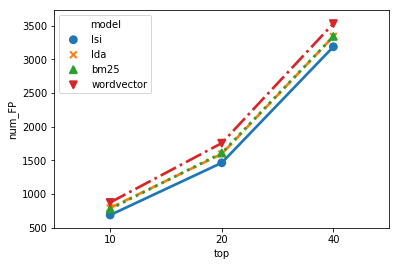

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.pointplot(y='num_FP', x='top', 
              hue='model', 
              col='retrieved', 
              markers=['o','x','^','v'], 
              linestyles=["-","--",":","-."], 
              data=retrieved_traces_df)

##### FP Details

In [46]:
df_bm25_t10 = aux_functions.detail_features_tc_br(bm25_fp_exc_set_t10, testcases, bugreports)
df_bm25_t40 = aux_functions.detail_features_tc_br(bm25_fp_exc_set_t40, testcases, bugreports)

bm25_t10_fp_amount_by_feat = df_bm25_t10.groupby('tc_feat').count()
bm25_t40_fp_amount_by_feat = df_bm25_t40.groupby('tc_feat').count()
bm25_t10_fp_amount_by_feat['model'] = 'bm25'
bm25_t40_fp_amount_by_feat['model'] = 'bm25'


df_lda_t10 = aux_functions.detail_features_tc_br(lda_fp_exc_set_t10, testcases, bugreports)
df_lda_t40 = aux_functions.detail_features_tc_br(lda_fp_exc_set_t40, testcases, bugreports)

lda_t10_fp_amount_by_feat = df_lda_t10.groupby('tc_feat').count()
lda_t40_fp_amount_by_feat = df_lda_t40.groupby('tc_feat').count()
lda_t10_fp_amount_by_feat['model'] = 'lda'
lda_t40_fp_amount_by_feat['model'] = 'lda'


df_lsi_t10 = aux_functions.detail_features_tc_br(lsi_fp_exc_set_t10, testcases, bugreports)
df_lsi_t40 = aux_functions.detail_features_tc_br(lsi_fp_exc_set_t40, testcases, bugreports)

lsi_t10_fp_amount_by_feat = df_lsi_t10.groupby('tc_feat').count()
lsi_t40_fp_amount_by_feat = df_lsi_t40.groupby('tc_feat').count()
lsi_t10_fp_amount_by_feat['model'] = 'lsi'
lsi_t40_fp_amount_by_feat['model'] = 'lsi'


df_wv_t10 = aux_functions.detail_features_tc_br(wv_fp_exc_set_t10, testcases, bugreports)
df_wv_t40 = aux_functions.detail_features_tc_br(wv_fp_exc_set_t40, testcases, bugreports)

wv_t10_fp_amount_by_feat = df_wv_t10.groupby('tc_feat').count()
wv_t40_fp_amount_by_feat = df_wv_t40.groupby('tc_feat').count()
wv_t10_fp_amount_by_feat['model'] = 'wordvector'
wv_t40_fp_amount_by_feat['model'] = 'wordvector'

In [47]:
df_t10 = pd.concat([bm25_t10_fp_amount_by_feat, lsi_t10_fp_amount_by_feat,
                   lda_t10_fp_amount_by_feat, wv_t10_fp_amount_by_feat])

df_t10 = df_t10[['tc','model']]
df_t10.reset_index(inplace=True)
df_t10.rename(columns={'tc':'FP_amount','tc_feat':'feature'}, inplace=True)
df_t10 = df_t10.pivot('feature','model','FP_amount')
df_t10.head(20)

model,bm25,lda,lsi,wordvector
feature,,,,
APZ - Async Scrolling,35.0,NaN,31.0,9.0
Browser Customization,23.0,15.0,35.0,2.0
Context Menu,51.0,71.0,22.0,141.0
Downloads Dropmaker,80.0,23.0,9.0,8.0
FLAC support,5.0,56.0,12.0,3.0
Flash support,1.0,NaN,9.0,3.0
Indicator for device permissions,45.0,18.0,56.0,28.0
New Awesome Bar,15.0,69.0,97.0,16.0
PDF Viewer,12.0,65.0,8.0,1.0


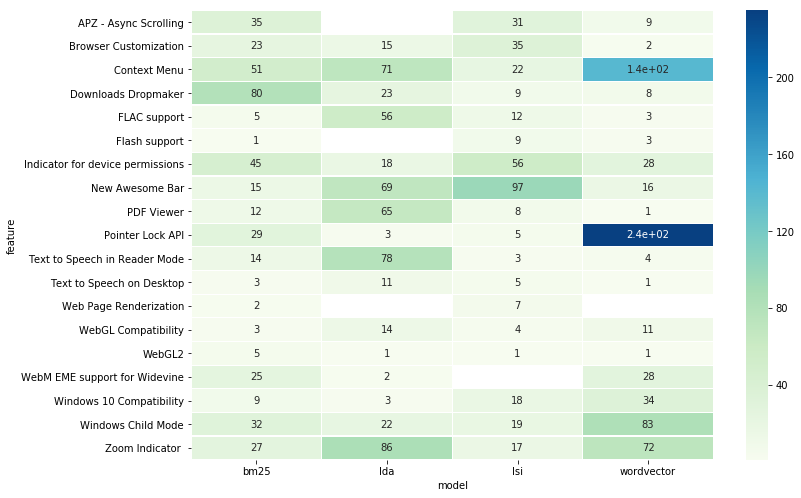

In [48]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=df_t10, linewidths=.3, annot=True, cmap='GnBu')

In [49]:
df_t40 = pd.concat([bm25_t40_fp_amount_by_feat, lsi_t40_fp_amount_by_feat,
                     lda_t40_fp_amount_by_feat,  wv_t40_fp_amount_by_feat])

df_t40 = df_t40[['tc','model']]
df_t40.reset_index(inplace=True)
df_t40.rename(columns={'tc':'FP_amount','tc_feat':'feature'}, inplace=True)
df_t40 = df_t40.pivot('feature','model','FP_amount')
df_t40.head(20)

model,bm25,lda,lsi,wordvector
feature,,,,
APZ - Async Scrolling,78.0,33.0,95.0,71.0
Browser Customization,49.0,47.0,75.0,26.0
Context Menu,112.0,171.0,71.0,523.0
Downloads Dropmaker,205.0,56.0,46.0,81.0
FLAC support,18.0,86.0,20.0,18.0
Flash support,3.0,10.0,15.0,12.0
Indicator for device permissions,91.0,17.0,133.0,119.0
New Awesome Bar,23.0,76.0,142.0,16.0
PDF Viewer,23.0,234.0,16.0,11.0


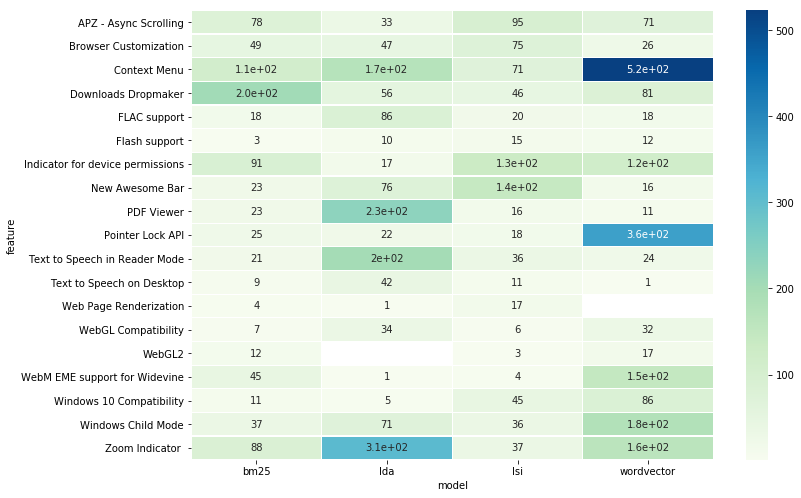

In [50]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=df_t40, linewidths=.3, annot=True, cmap='GnBu')

In [51]:
aux_functions.detail_features_tc_br_groups(lsi_fp_exc_set_t40, testcases=testcases, bugreports=bugreports)

,br,br_summary,tc_feat,tc_ids
0,1248268,"Unable to disable ""Recently bookmarked""",Browser Customization,[64]
1,1248268,"Unable to disable ""Recently bookmarked""",Downloads Dropmaker,[163]
2,1248268,"Unable to disable ""Recently bookmarked""",New Awesome Bar,"[13, 25, 23]"
3,1248268,"Unable to disable ""Recently bookmarked""",Web Page Renderization,"[124, 123]"
4,1248268,"Unable to disable ""Recently bookmarked""",Windows Child Mode,"[32, 26, 30, 27]"
5,1248268,"Unable to disable ""Recently bookmarked""",Zoom Indicator,[143]
6,1257087,Middle mouse click on history item would not open,APZ - Async Scrolling,"[57, 50, 58, 53, 48, 54, 56, 51, 52]"
7,1257087,Middle mouse click on history item would not open,New Awesome Bar,"[15, 18, 13, 21, 22, 24, 19, 20]"
8,1267480,Intermittent browser/components/preferences/in-content/tests/browser_security.jsThis test exceeded the timeout threshold. It should be rewritten or split up.,APZ - Async Scrolling,[55]
9,1267480,Intermittent browser/components/preferences/in-content/tests/browser_security.jsThis test exceeded the timeout threshold. It should be rewritten or split up.,Downloads Dropmaker,"[161, 159, 167, 160]"


In [52]:
aux_functions.detail_features_tc_br_groups(wv_fp_exc_set_t40, testcases=testcases, bugreports=bugreports)

,br,br_summary,tc_feat,tc_ids
0,1248267,"Right click on bookmark item of ""Recently Bookmarked"" should show regular places context menu",Browser Customization,[59]
1,1248267,"Right click on bookmark item of ""Recently Bookmarked"" should show regular places context menu",New Awesome Bar,[14]
2,1248267,"Right click on bookmark item of ""Recently Bookmarked"" should show regular places context menu",Pointer Lock API,[135]
3,1248267,"Right click on bookmark item of ""Recently Bookmarked"" should show regular places context menu",Windows Child Mode,"[29, 28]"
4,1248268,"Unable to disable ""Recently bookmarked""",Flash support,[196]
5,1248268,"Unable to disable ""Recently bookmarked""",Indicator for device permissions,"[193, 189, 185, 187, 180]"
6,1248268,"Unable to disable ""Recently bookmarked""",Pointer Lock API,"[135, 131, 127, 133, 128]"
7,1248268,"Unable to disable ""Recently bookmarked""",Text to Speech in Reader Mode,[115]
8,1248268,"Unable to disable ""Recently bookmarked""",WebM EME support for Widevine,[139]
9,1248268,"Unable to disable ""Recently bookmarked""",Windows 10 Compatibility,"[106, 107, 104]"


#### False Negatives Analysis

In [53]:
bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'FN')
bm25_fn_set_t20, lsi_fn_set_t20, lda_fn_set_t20, wv_fn_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'FN')
bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'FN')

#aux_functions.plot_venn_diagrams(10, bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10, 'FN')
#aux_functions.plot_venn_diagrams(40, bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40, 'FN')

In [54]:
df = pd.DataFrame(index=['TOP 10', 'TOP 20', 'TOP 40'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 10','BM25'] = len(bm25_fn_set_t10)
df.at['TOP 20','BM25'] = len(bm25_fn_set_t20)
df.at['TOP 40','BM25'] = len(bm25_fn_set_t40)

df.at['TOP 10','LSI'] = len(lsi_fn_set_t10)
df.at['TOP 20','LSI'] = len(lsi_fn_set_t20)
df.at['TOP 40','LSI'] = len(lsi_fn_set_t40)

df.at['TOP 10','LDA'] = len(lda_fn_set_t10)
df.at['TOP 20','LDA'] = len(lda_fn_set_t20)
df.at['TOP 40','LDA'] = len(lda_fn_set_t40)

df.at['TOP 10','WordVector'] = len(wv_fn_set_t10)
df.at['TOP 20','WordVector'] = len(wv_fn_set_t20)
df.at['TOP 40','WordVector'] = len(wv_fn_set_t40)

print()

df

,BM25,LSI,LDA,WordVector
TOP 10,381,293,398,480
TOP 20,301,158,290,450
TOP 40,211,60,213,404


##### Exclusive Traces

In [55]:
print("TOP 10 ------------------------------")
bm25_fn_exc_set_t10, lsi_fn_exc_set_t10, lda_fn_exc_set_t10, wv_fn_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10, traces_type='FN')

print("\n\nTOP 20 -------------------------------")
bm25_fn_exc_set_t20, lsi_fn_exc_set_t20, lda_fn_exc_set_t20, wv_fn_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_fn_set_t20, lsi_fn_set_t20, lda_fn_set_t20, wv_fn_set_t20, traces_type='FN')

print("\n\nTOP 40 -------------------------------")
bm25_fn_exc_set_t40, lsi_fn_exc_set_t40, lda_fn_exc_set_t40, wv_fn_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40, traces_type='FN')

TOP 10 ------------------------------
BM25 Exclusive FN:
len(bm25_exc_set): 0


LSI Exclusive FN:
len(lsi_exc_set): 0


LDA Exclusive FN:
len(lda_exc_set): 11


WV Exclusive FN:
len(wv_exc_set): 33


TOP 20 -------------------------------
BM25 Exclusive FN:
len(bm25_exc_set): 7


LSI Exclusive FN:
len(lsi_exc_set): 4


LDA Exclusive FN:
len(lda_exc_set): 7


WV Exclusive FN:
len(wv_exc_set): 92


TOP 40 -------------------------------
BM25 Exclusive FN:
len(bm25_exc_set): 4


LSI Exclusive FN:
len(lsi_exc_set): 2


LDA Exclusive FN:
len(lda_exc_set): 25


WV Exclusive FN:
len(wv_exc_set): 138


##### FN Details

In [56]:
df_bm25_t10 = aux_functions.detail_features_tc_br(bm25_fn_exc_set_t10, testcases, bugreports)
df_bm25_t40 = aux_functions.detail_features_tc_br(bm25_fn_exc_set_t40, testcases, bugreports)

bm25_t10_fn_amount_by_feat = df_bm25_t10.groupby('tc_feat').count()
bm25_t40_fn_amount_by_feat = df_bm25_t40.groupby('tc_feat').count()
bm25_t10_fn_amount_by_feat['model'] = 'bm25'
bm25_t40_fn_amount_by_feat['model'] = 'bm25'


df_lda_t10 = aux_functions.detail_features_tc_br(lda_fn_exc_set_t10, testcases, bugreports)
df_lda_t40 = aux_functions.detail_features_tc_br(lda_fn_exc_set_t40, testcases, bugreports)

lda_t10_fn_amount_by_feat = df_lda_t10.groupby('tc_feat').count()
lda_t40_fn_amount_by_feat = df_lda_t40.groupby('tc_feat').count()
lda_t10_fn_amount_by_feat['model'] = 'lda'
lda_t40_fn_amount_by_feat['model'] = 'lda'


df_lsi_t10 = aux_functions.detail_features_tc_br(lsi_fn_exc_set_t10, testcases, bugreports)
df_lsi_t40 = aux_functions.detail_features_tc_br(lsi_fn_exc_set_t40, testcases, bugreports)

lsi_t10_fn_amount_by_feat = df_lsi_t10.groupby('tc_feat').count()
lsi_t40_fn_amount_by_feat = df_lsi_t40.groupby('tc_feat').count()
lsi_t10_fn_amount_by_feat['model'] = 'lsi'
lsi_t40_fn_amount_by_feat['model'] = 'lsi'


df_wv_t10 = aux_functions.detail_features_tc_br(wv_fn_exc_set_t10, testcases, bugreports)
df_wv_t40 = aux_functions.detail_features_tc_br(wv_fn_exc_set_t40, testcases, bugreports)

wv_t10_fn_amount_by_feat = df_wv_t10.groupby('tc_feat').count()
wv_t40_fn_amount_by_feat = df_wv_t40.groupby('tc_feat').count()
wv_t10_fn_amount_by_feat['model'] = 'wordvector'
wv_t40_fn_amount_by_feat['model'] = 'wordvector'

###### TOP 10

In [57]:
df_t10 = pd.concat([bm25_t10_fn_amount_by_feat,  lsi_t10_fn_amount_by_feat,
                     lda_t10_fn_amount_by_feat, wv_t10_fn_amount_by_feat])

df_t10 = df_t10[['tc','model']]
df_t10.reset_index(inplace=True)
df_t10.rename(columns={'tc':'FN_amount','tc_feat':'feature'}, inplace=True)
df_t10 = df_t10.pivot('feature','model','FN_amount')
df_t10.head(20)

model,lda,wordvector
feature,,
Browser Customization,NaN,2.0
Context Menu,2.0,NaN
Downloads Dropmaker,NaN,11.0
Indicator for device permissions,2.0,3.0
New Awesome Bar,6.0,15.0
PDF Viewer,NaN,1.0
Zoom Indicator,1.0,1.0


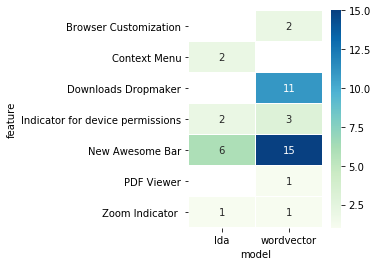

In [58]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (3, 4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=df_t10, linewidths=.3, annot=True, cmap='GnBu')

###### TOP 40

In [59]:
df_t40 = pd.concat([bm25_t40_fn_amount_by_feat, lsi_t40_fn_amount_by_feat,
                     lda_t40_fn_amount_by_feat,  wv_t40_fn_amount_by_feat])

df_t40 = df_t40[['tc','model']]
df_t40.reset_index(inplace=True)
df_t40.rename(columns={'tc':'FN_amount','tc_feat':'feature'}, inplace=True)
df_t40 = df_t40.pivot('feature','model','FN_amount')
df_t40.head(20)

model,bm25,lda,lsi,wordvector
feature,,,,
Browser Customization,NaN,NaN,1.0,4.0
Context Menu,4.0,13.0,NaN,1.0
Downloads Dropmaker,NaN,2.0,1.0,41.0
Indicator for device permissions,NaN,1.0,NaN,15.0
New Awesome Bar,NaN,9.0,NaN,57.0
PDF Viewer,NaN,NaN,NaN,8.0
Zoom Indicator,NaN,NaN,NaN,12.0


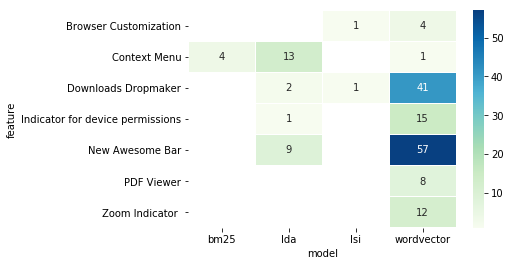

In [60]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (6, 4)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(ax=ax, data=df_t40, linewidths=.3, annot=True, cmap='GnBu')

**LSI Exclusive FN Top 40**

In [61]:
aux_functions.detail_features_tc_br_groups(lsi_fn_exc_set_t40, testcases, bugreports).sort_values(by='tc_feat')

,br,br_summary,tc_feat,tc_ids
0,1357458,After Customization - typed text in the Awesome bar doesn't correspond with the text from One-Off-Searches bar,Browser Customization,[59]
1,1432915,Do not write the kMDItemWhereFroms xattr metadata for files downloaded in Private Browsing mode,Downloads Dropmaker,[162]


**BM25 Exclusive FN Top 40**

In [62]:
aux_functions.detail_features_tc_br_groups(bm25_fn_exc_set_t40, testcases, bugreports).sort_values(by='tc_feat')

,br,br_summary,tc_feat,tc_ids
0,1248267,"Right click on bookmark item of ""Recently Bookmarked"" should show regular places context menu",Context Menu,"[78, 95, 74]"
1,1299458,Telemetry data from Search bar is not properly collected when searching in new tab from context menu,Context Menu,[92]


**LDA Exclusive FN Top 40**

In [63]:
aux_functions.detail_features_tc_br_groups(lda_fn_exc_set_t40, testcases, bugreports).sort_values(by='tc_feat')

,br,br_summary,tc_feat,tc_ids
4,1299458,Telemetry data from Search bar is not properly collected when searching in new tab from context menu,Context Menu,"[88, 98, 99, 94, 100, 85, 90, 91, 101, 96, 86, 87, 81]"
10,1432915,Do not write the kMDItemWhereFroms xattr metadata for files downloaded in Private Browsing mode,Downloads Dropmaker,"[159, 160]"
3,1296322,X button is vertically misaligned on the permission dropdown,Indicator for device permissions,[190]
0,1264988,Scrollbar appears for a moment in the new Awesomebar Resultlist,New Awesome Bar,[14]
1,1279864,The new location bar autocomplete drop down menu starting from 48 has serious performance issue and often blocks user's <Enter> input,New Awesome Bar,[14]
2,1293308,System font setting respected by location bar but ignored by location bar's autocomplete drop-down list,New Awesome Bar,[14]
5,1301421,browser.fixup.dns_first_for_single_words prevents location bar search suggestions even when there's more than one token and/or the first token is not a single word,New Awesome Bar,[14]
6,1334844,"Address bar uses most recently entered URL, not URL in bar, after using CTRL+ENTER",New Awesome Bar,[14]
7,1337682,using ctrl / shift + enter seems to save the URL to a hidden clipboard that populates when hitting enter (hard to describe).,New Awesome Bar,[14]
8,1339497,firefox tries to load incorrect url if urlbar autocomplete suggests first-two-letters-duplicated hosts when input url contains % encoded components,New Awesome Bar,"[14, 13]"


**Word Vector Exclusive FN Top 40**

In [64]:
aux_functions.detail_features_tc_br_groups(wv_fn_exc_set_t40, testcases, bugreports).sort_values(by='tc_feat')

,br,br_summary,tc_feat,tc_ids
20,1357458,After Customization - typed text in the Awesome bar doesn't correspond with the text from One-Off-Searches bar,Browser Customization,[62]
14,1318903,"[Windows 7 and below] Fullscreen window controls not shown with dark themes, close button has broken ""red square"" hover state",Browser Customization,"[61, 64, 60]"
0,1270983,Intermittent browser_contextmenu.jsTest timed outFound a tab after previous test timed out: subtst_contextmenu.html -,Context Menu,[89]
4,1292573,Broken keyboard interaction with the subview in the Downloads Panel,Downloads Dropmaker,"[170, 155, 166, 162, 169, 168, 165, 164, 154, 167, 157, 156, 163, 153]"
22,1432915,Do not write the kMDItemWhereFroms xattr metadata for files downloaded in Private Browsing mode,Downloads Dropmaker,"[163, 166]"
3,1292566,"The ""open"" button in the subview for temporarily blocked downloads should not ask for confirmation",Downloads Dropmaker,"[153, 154, 163, 168, 164, 155, 156, 169, 166, 165, 170, 161, 157, 162, 167]"
2,1287384,Incorrect alignment of Summary section in Downloads panel,Downloads Dropmaker,"[163, 167, 164, 169, 165, 170, 162, 157, 154, 166]"
7,1296322,X button is vertically misaligned on the permission dropdown,Indicator for device permissions,"[189, 194, 186, 183, 180, 181, 195, 192, 182, 193, 185]"
17,1345687,[Regression] Clicking on audioVideoButton / sharing-icon don't work when typed on urlbar,Indicator for device permissions,"[192, 190, 182, 191]"
5,1294733,Awesomebar search buttons show auto completed text not user input,New Awesome Bar,"[15, 18, 13, 17, 16]"


### Retrieved Traces - Similarity Threshold 0.9

In [65]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_vol_intersec_strat_runner.get_oracle(), evals_df=evals_df_2, top_values=[10,20,40], sim_threshs=[0.9])

#### Traces Not Captured by Any Technique

In [66]:
print('TOP 10 --------------------------')
all_captured_traces_t10_inter = aux_functions.get_captured_traces_union(top_value=10, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t10_inter = oracle_true_traces_inter - all_captured_traces_t10_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t10_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t10_inter), len(oracle_true_traces_inter), len(not_captured_traces_t10_inter)/len(oracle_true_traces_inter)*100))

print('\n\nTOP 20 --------------------------')
all_captured_traces_t20_inter = aux_functions.get_captured_traces_union(top_value=20, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t20_inter = oracle_true_traces_inter - all_captured_traces_t20_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t20_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t20_inter), len(oracle_true_traces_inter), len(not_captured_traces_t20_inter)/len(oracle_true_traces_inter)*100))

print('\n\nTOP 40 --------------------------')
all_captured_traces_t40_inter = aux_functions.get_captured_traces_union(top_value=40, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t40_inter = oracle_true_traces_inter - all_captured_traces_t40_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t40_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t40_inter), len(oracle_true_traces_inter), len(not_captured_traces_t40_inter)/len(oracle_true_traces_inter)*100))

TOP 10 --------------------------
len(not_captured_traces): 413
percent not_captured_traces: 413/514 * 100 : 80.35%


TOP 20 --------------------------
len(not_captured_traces): 382
percent not_captured_traces: 382/514 * 100 : 74.32%


TOP 40 --------------------------
len(not_captured_traces): 344
percent not_captured_traces: 344/514 * 100 : 66.93%


#### Traces Captured by Every Technique

In [67]:
import pprint

print('TOP 10 -----------------------')
traces_captured_by_all_t10_inter = aux_functions.get_captured_traces_intersec(10, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t10_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t10_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t10_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t10_inter)

print('\n\nTOP 20 -----------------------')
traces_captured_by_all_t20_inter = aux_functions.get_captured_traces_intersec(20, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t20_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t20_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t20_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t20_inter)

print('\n\nTOP 40 -----------------------')
traces_captured_by_all_t40_inter = aux_functions.get_captured_traces_intersec(40, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t40_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t40_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t40_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t40_inter)

TOP 10 -----------------------
len(traces_captured_by_all): 0
percent traces_captured_by_all: 0/514 * 100 : 0.0%
set()


TOP 20 -----------------------
len(traces_captured_by_all): 0
percent traces_captured_by_all: 0/514 * 100 : 0.0%
set()


TOP 40 -----------------------
len(traces_captured_by_all): 0
percent traces_captured_by_all: 0/514 * 100 : 0.0%
set()


#### Techniques Evaluation

In [68]:
retrieved_traces_df[['top','sim_thresh','model','num_TP','num_FP','num_FN','precision','recall','fscore']].head(50)

,top,sim_thresh,model,num_TP,num_FP,num_FN,precision,recall,fscore
0,10,0.9,lsi,23,26,491,46.94,4.47,5.46
3,10,0.9,lda,32,125,482,20.38,6.23,7.23
6,10,0.9,bm25,39,150,475,20.63,7.59,8.69
9,10,0.9,wordvector,34,802,480,4.07,6.61,5.88
1,20,0.9,lsi,23,26,491,46.94,4.47,5.46
4,20,0.9,lda,38,158,476,19.39,7.39,8.44
7,20,0.9,bm25,39,150,475,20.63,7.59,8.69
10,20,0.9,wordvector,64,1602,450,3.84,12.45,8.60
2,40,0.9,lsi,23,26,491,46.94,4.47,5.46
5,40,0.9,lda,38,166,476,18.63,7.39,8.41


#### True Positives Analysis

In [69]:
bm25_tp_set_t10, lsi_tp_set_t10, lda_tp_set_t10, wv_tp_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'TP')
bm25_tp_set_t20, lsi_tp_set_t20, lda_tp_set_t20, wv_tp_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'TP')
bm25_tp_set_t40, lsi_tp_set_t40, lda_tp_set_t40, wv_tp_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'TP')

#aux_functions.plot_venn_diagrams(TOP, bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, 'True Positives')

df = pd.DataFrame(index=['TOP 10', 'TOP 20', 'TOP 40'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 10','BM25'] = len(bm25_tp_set_t10)
df.at['TOP 20','BM25'] = len(bm25_tp_set_t20)
df.at['TOP 40','BM25'] = len(bm25_tp_set_t40)

df.at['TOP 10','LSI'] = len(lsi_tp_set_t10)
df.at['TOP 20','LSI'] = len(lsi_tp_set_t20)
df.at['TOP 40','LSI'] = len(lsi_tp_set_t40)

df.at['TOP 10','LDA'] = len(lda_tp_set_t10)
df.at['TOP 20','LDA'] = len(lda_tp_set_t20)
df.at['TOP 40','LDA'] = len(lda_tp_set_t40)

df.at['TOP 10','WordVector'] = len(wv_tp_set_t10)
df.at['TOP 20','WordVector'] = len(wv_tp_set_t20)
df.at['TOP 40','WordVector'] = len(wv_tp_set_t40)

print()

df

,BM25,LSI,LDA,WordVector
TOP 10,39,23,32,34
TOP 20,39,23,38,64
TOP 40,39,23,38,109


##### Exclusive Traces

In [70]:
import pandas as pd

print("TOP 10 ------------------------------")
bm25_tp_exc_set_t10, lsi_tp_exc_set_t10, lda_tp_exc_set_t10, wv_tp_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_tp_set_t10, lsi_tp_set_t10, lda_tp_set_t10, wv_tp_set_t10, traces_type='TP')

print("\n\nTOP 20 ------------------------------")
bm25_tp_exc_set_t20, lsi_tp_exc_set_t20, lda_tp_exc_set_t20, wv_tp_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_tp_set_t20, lsi_tp_set_t20, lda_tp_set_t20, wv_tp_set_t20, traces_type='TP')

print("\n\nTOP 40 -------------------------------")
bm25_tp_exc_set_t40, lsi_tp_exc_set_t40, lda_tp_exc_set_t40, wv_tp_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_tp_set_t40, lsi_tp_set_t40, lda_tp_set_t40, wv_tp_set_t40, traces_type='TP')

df = pd.DataFrame(index=['TOP 10', 'TOP 20', 'TOP 40'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 10','BM25'] = len(bm25_tp_exc_set_t10)
df.at['TOP 20','BM25'] = len(bm25_tp_exc_set_t20)
df.at['TOP 40','BM25'] = len(bm25_tp_exc_set_t40)

df.at['TOP 10','LSI'] = len(lsi_tp_exc_set_t10)
df.at['TOP 20','LSI'] = len(lsi_tp_exc_set_t20)
df.at['TOP 40','LSI'] = len(lsi_tp_exc_set_t40)

df.at['TOP 10','LDA'] = len(lda_tp_exc_set_t10)
df.at['TOP 20','LDA'] = len(lda_tp_exc_set_t20)
df.at['TOP 40','LDA'] = len(lda_tp_exc_set_t40)

df.at['TOP 10','WordVector'] = len(wv_tp_exc_set_t10)
df.at['TOP 20','WordVector'] = len(wv_tp_exc_set_t20)
df.at['TOP 40','WordVector'] = len(wv_tp_exc_set_t40)

print()

df

TOP 10 ------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 25


LSI Exclusive TP:
len(lsi_exc_set): 8


LDA Exclusive TP:
len(lda_exc_set): 23


WV Exclusive TP:
len(wv_exc_set): 22


TOP 20 ------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 21


LSI Exclusive TP:
len(lsi_exc_set): 8


LDA Exclusive TP:
len(lda_exc_set): 28


WV Exclusive TP:
len(wv_exc_set): 47


TOP 40 -------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 15


LSI Exclusive TP:
len(lsi_exc_set): 7


LDA Exclusive TP:
len(lda_exc_set): 28


WV Exclusive TP:
len(wv_exc_set): 85



,BM25,LSI,LDA,WordVector
TOP 10,25,8,23,22
TOP 20,21,8,28,47
TOP 40,15,7,28,85


##### TP Details

In [71]:
df_bm25_t10 = aux_functions.detail_features_tc_br(bm25_tp_exc_set_t10, testcases, bugreports)
df_bm25_t40 = aux_functions.detail_features_tc_br(bm25_tp_exc_set_t40, testcases, bugreports)

bm25_t10_tp_amount_by_feat = df_bm25_t10.groupby('tc_feat').count()
bm25_t40_tp_amount_by_feat = df_bm25_t40.groupby('tc_feat').count()
bm25_t10_tp_amount_by_feat['model'] = 'bm25'
bm25_t40_tp_amount_by_feat['model'] = 'bm25'


df_lda_t10 = aux_functions.detail_features_tc_br(lda_tp_exc_set_t10, testcases, bugreports)
df_lda_t40 = aux_functions.detail_features_tc_br(lda_tp_exc_set_t40, testcases, bugreports)

lda_t10_tp_amount_by_feat = df_lda_t10.groupby('tc_feat').count()
lda_t40_tp_amount_by_feat = df_lda_t40.groupby('tc_feat').count()
lda_t10_tp_amount_by_feat['model'] = 'lda'
lda_t40_tp_amount_by_feat['model'] = 'lda'


df_lsi_t10 = aux_functions.detail_features_tc_br(lsi_tp_exc_set_t10, testcases, bugreports)
df_lsi_t40 = aux_functions.detail_features_tc_br(lsi_tp_exc_set_t40, testcases, bugreports)

lsi_t10_tp_amount_by_feat = df_lsi_t10.groupby('tc_feat').count()
lsi_t40_tp_amount_by_feat = df_lsi_t40.groupby('tc_feat').count()
lsi_t10_tp_amount_by_feat['model'] = 'lsi'
lsi_t40_tp_amount_by_feat['model'] = 'lsi'


df_wv_t10 = aux_functions.detail_features_tc_br(wv_tp_exc_set_t10, testcases, bugreports)
df_wv_t40 = aux_functions.detail_features_tc_br(wv_tp_exc_set_t40, testcases, bugreports)

wv_t10_tp_amount_by_feat = df_wv_t10.groupby('tc_feat').count()
wv_t40_tp_amount_by_feat = df_wv_t40.groupby('tc_feat').count()
wv_t10_tp_amount_by_feat['model'] = 'wordvector'
wv_t40_tp_amount_by_feat['model'] = 'wordvector'

###### TOP 10

In [72]:
df_t10 = pd.concat([bm25_t10_tp_amount_by_feat,  lsi_t10_tp_amount_by_feat,
                     lda_t10_tp_amount_by_feat,   wv_t10_tp_amount_by_feat])

df_t10 = df_t10[['tc','model']]
df_t10.reset_index(inplace=True)
df_t10.rename(columns={'tc':'TP_amount','tc_feat':'feature'}, inplace=True)
df_t10 = df_t10.pivot('feature','model','TP_amount')
df_t10.head(20)

model,bm25,lda,lsi,wordvector
feature,,,,
Browser Customization,3.0,NaN,NaN,NaN
Context Menu,NaN,1.0,NaN,12.0
Downloads Dropmaker,9.0,3.0,8.0,2.0
Indicator for device permissions,5.0,NaN,NaN,2.0
New Awesome Bar,6.0,19.0,NaN,4.0
PDF Viewer,1.0,NaN,NaN,NaN
Zoom Indicator,1.0,NaN,NaN,2.0


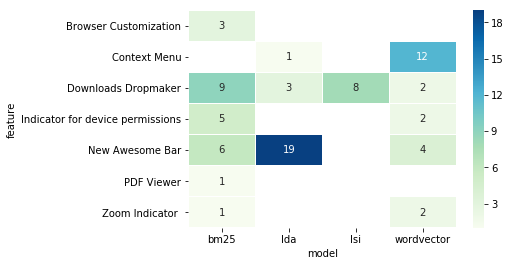

In [73]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (6, 4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=df_t10, linewidths=.3, annot=True, cmap='GnBu')

###### TOP 40

In [74]:
df_t40 = pd.concat([bm25_t40_tp_amount_by_feat, lsi_t40_tp_amount_by_feat,
                     lda_t40_tp_amount_by_feat,  wv_t40_tp_amount_by_feat])

df_t40 = df_t40[['tc','model']]
df_t40.reset_index(inplace=True)
df_t40.rename(columns={'tc':'TP_amount','tc_feat':'feature'}, inplace=True)
df_t40 = df_t40.pivot('feature','model','TP_amount')
df_t40.head(20)

model,bm25,lda,lsi,wordvector
feature,,,,
Browser Customization,2.0,NaN,NaN,1.0
Context Menu,NaN,NaN,NaN,44.0
Downloads Dropmaker,4.0,3.0,7.0,11.0
Indicator for device permissions,5.0,NaN,NaN,12.0
New Awesome Bar,3.0,25.0,NaN,10.0
PDF Viewer,1.0,NaN,NaN,NaN
Zoom Indicator,NaN,NaN,NaN,7.0


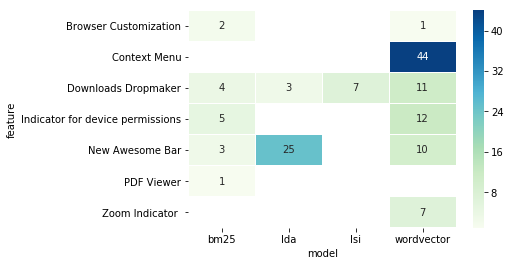

In [75]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (6, 4)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(ax=ax, data=df_t40, linewidths=.3, annot=True, cmap='GnBu')

In [94]:
aux_functions.detail_features_tc_br_groups(lsi_tp_exc_set_t40, testcases, bugreports).sort_values(by='tc_feat')

,br,br_summary,tc_feat,tc_ids
0,1287384,Incorrect alignment of Summary section in Downloads panel,Downloads Dropmaker,"[154, 157, 169]"
1,1292566,"The ""open"" button in the subview for temporarily blocked downloads should not ask for confirmation",Downloads Dropmaker,"[169, 157, 155]"
2,1292573,Broken keyboard interaction with the subview in the Downloads Panel,Downloads Dropmaker,[155]


#### False Positives Analysis

In [100]:
bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'FP')
bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'FP')
bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'FP')

#aux_functions.plot_venn_diagrams(10, bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10, 'FP')
#print('====================')
#aux_functions.plot_venn_diagrams(20, bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20, 'FP')
#print('====================')
#aux_functions.plot_venn_diagrams(40, bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40, 'FP')

##### Exclusive Traces

In [101]:
print("TOP 10 ------------------------------")
bm25_fp_exc_set_t10, lsi_fp_exc_set_t10, lda_fp_exc_set_t10, wv_fp_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10, traces_type='FP')

print("\n\nTOP 20 ------------------------------")
bm25_fp_exc_set_t20, lsi_fp_exc_set_t20, lda_fp_exc_set_t20, wv_fp_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20, traces_type='FP')

print("\n\nTOP 40 -------------------------------")
bm25_fp_exc_set_t40, lsi_fp_exc_set_t40, lda_fp_exc_set_t40, wv_fp_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40, traces_type='FP')

TOP 10 ------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 110


LSI Exclusive FP:
len(lsi_exc_set): 8


LDA Exclusive FP:
len(lda_exc_set): 103


WV Exclusive FP:
len(wv_exc_set): 754


TOP 20 ------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 94


LSI Exclusive FP:
len(lsi_exc_set): 6


LDA Exclusive FP:
len(lda_exc_set): 121


WV Exclusive FP:
len(wv_exc_set): 1525


TOP 40 -------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 71


LSI Exclusive FP:
len(lsi_exc_set): 6


LDA Exclusive FP:
len(lda_exc_set): 101


WV Exclusive FP:
len(wv_exc_set): 3074


##### FP Details

In [102]:
df_bm25_t10 = aux_functions.detail_features_tc_br(bm25_fp_exc_set_t10, testcases, bugreports)
df_bm25_t40 = aux_functions.detail_features_tc_br(bm25_fp_exc_set_t40, testcases, bugreports)

bm25_t10_fp_amount_by_feat = df_bm25_t10.groupby('tc_feat').count()
bm25_t40_fp_amount_by_feat = df_bm25_t40.groupby('tc_feat').count()
bm25_t10_fp_amount_by_feat['model'] = 'bm25'
bm25_t40_fp_amount_by_feat['model'] = 'bm25'


df_lda_t10 = aux_functions.detail_features_tc_br(lda_fp_exc_set_t10, testcases, bugreports)
df_lda_t40 = aux_functions.detail_features_tc_br(lda_fp_exc_set_t40, testcases, bugreports)

lda_t10_fp_amount_by_feat = df_lda_t10.groupby('tc_feat').count()
lda_t40_fp_amount_by_feat = df_lda_t40.groupby('tc_feat').count()
lda_t10_fp_amount_by_feat['model'] = 'lda'
lda_t40_fp_amount_by_feat['model'] = 'lda'


df_lsi_t10 = aux_functions.detail_features_tc_br(lsi_fp_exc_set_t10, testcases, bugreports)
df_lsi_t40 = aux_functions.detail_features_tc_br(lsi_fp_exc_set_t40, testcases, bugreports)

lsi_t10_fp_amount_by_feat = df_lsi_t10.groupby('tc_feat').count()
lsi_t40_fp_amount_by_feat = df_lsi_t40.groupby('tc_feat').count()
lsi_t10_fp_amount_by_feat['model'] = 'lsi'
lsi_t40_fp_amount_by_feat['model'] = 'lsi'


df_wv_t10 = aux_functions.detail_features_tc_br(wv_fp_exc_set_t10, testcases, bugreports)
df_wv_t40 = aux_functions.detail_features_tc_br(wv_fp_exc_set_t40, testcases, bugreports)

wv_t10_fp_amount_by_feat = df_wv_t10.groupby('tc_feat').count()
wv_t40_fp_amount_by_feat = df_wv_t40.groupby('tc_feat').count()
wv_t10_fp_amount_by_feat['model'] = 'wordvector'
wv_t40_fp_amount_by_feat['model'] = 'wordvector'

###### TOP 10

In [103]:
df_t10 = pd.concat([bm25_t10_fp_amount_by_feat,  lsi_t10_fp_amount_by_feat,
                     lda_t10_fp_amount_by_feat,   wv_t10_fp_amount_by_feat])

df_t10 = df_t10[['tc','model']]
df_t10.reset_index(inplace=True)
df_t10.rename(columns={'tc':'FP_amount','tc_feat':'feature'}, inplace=True)
df_t10 = df_t10.pivot('feature','model','FP_amount')
df_t10.head(20)

model,bm25,lda,lsi,wordvector
feature,,,,
APZ - Async Scrolling,3.0,NaN,NaN,5.0
Browser Customization,4.0,6.0,NaN,3.0
Context Menu,11.0,10.0,1.0,172.0
Downloads Dropmaker,16.0,5.0,NaN,9.0
FLAC support,2.0,17.0,NaN,6.0
Flash support,NaN,NaN,NaN,3.0
Indicator for device permissions,14.0,NaN,4.0,40.0
New Awesome Bar,17.0,9.0,NaN,24.0
PDF Viewer,5.0,13.0,NaN,1.0


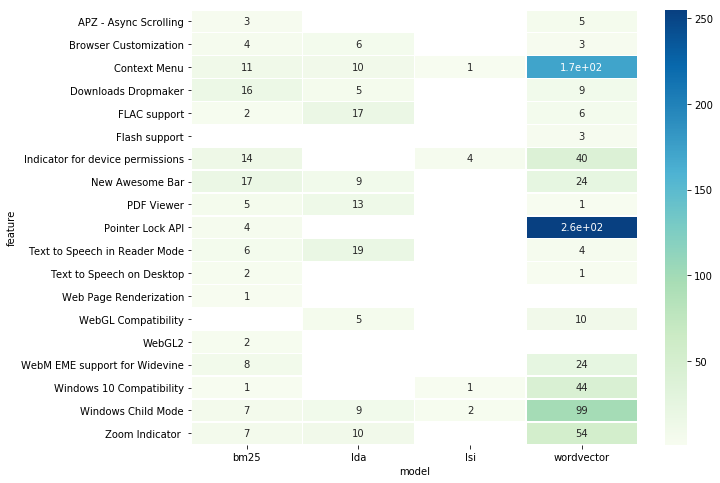

In [104]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=df_t10, linewidths=.3, annot=True, cmap='GnBu')

###### TOP 40

In [105]:
df_t40 = pd.concat([bm25_t40_fp_amount_by_feat, lsi_t40_fp_amount_by_feat,
                     lda_t40_fp_amount_by_feat,  wv_t40_fp_amount_by_feat])

df_t40 = df_t40[['tc','model']]
df_t40.reset_index(inplace=True)
df_t40.rename(columns={'tc':'FP_amount','tc_feat':'feature'}, inplace=True)
df_t40 = df_t40.pivot('feature','model','FP_amount')
df_t40.head(20)

model,bm25,lda,lsi,wordvector
feature,,,,
APZ - Async Scrolling,2.0,NaN,NaN,73.0
Browser Customization,4.0,5.0,NaN,43.0
Context Menu,1.0,4.0,NaN,921.0
Downloads Dropmaker,10.0,3.0,NaN,165.0
FLAC support,2.0,17.0,NaN,29.0
Flash support,NaN,NaN,NaN,23.0
Indicator for device permissions,10.0,NaN,4.0,251.0
New Awesome Bar,13.0,10.0,NaN,47.0
PDF Viewer,5.0,14.0,NaN,19.0


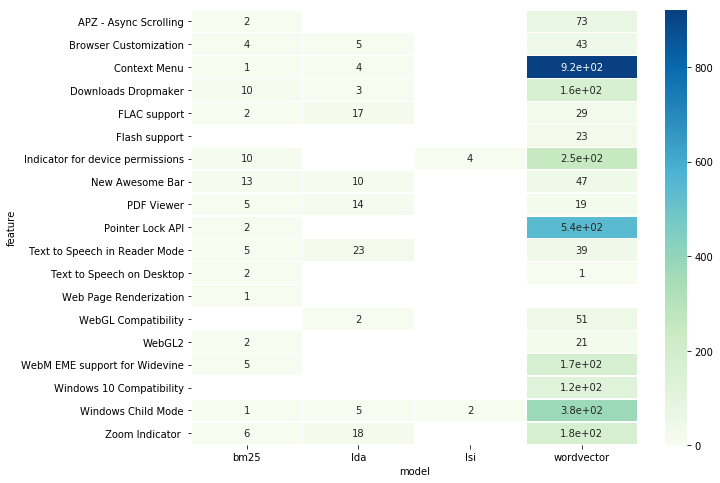

In [106]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(ax=ax, data=df_t40, linewidths=.3, annot=True, cmap='GnBu')

#### False Negatives Analysis

In [83]:
bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'FN')
bm25_fn_set_t20, lsi_fn_set_t20, lda_fn_set_t20, wv_fn_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'FN')
bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'FN')

#print("TOP 10 -----------------------------------")
#aux_functions.plot_venn_diagrams(10, bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10, 'FN')

#print("\n\nTOP 40 -----------------------------------")
#aux_functions.plot_venn_diagrams(40, bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40, 'FN')

##### Exclusive Traces

In [84]:
print("TOP 10 ------------------------------")
bm25_fn_exc_set_t10, lsi_fn_exc_set_t10, lda_fn_exc_set_t10, wv_fn_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10, traces_type='FN', verbose=True)

print("\n\nTOP 20 -------------------------------")
bm25_fn_exc_set_t20, lsi_fn_exc_set_t20, lda_fn_exc_set_t20, wv_fn_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_fn_set_t20, lsi_fn_set_t20, lda_fn_set_t20, wv_fn_set_t20, traces_type='FN', verbose=True)

print("\n\nTOP 40 -------------------------------")
bm25_fn_exc_set_t40, lsi_fn_exc_set_t40, lda_fn_exc_set_t40, wv_fn_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40, traces_type='FN', verbose=True)

TOP 10 ------------------------------
BM25 Exclusive FN:


set()

len(bm25_exc_set): 0


LSI Exclusive FN:


set()

len(lsi_exc_set): 0


LDA Exclusive FN:


{(14, 1294733), (75, 1248267), (77, 1248267), (93, 1248267)}

len(lda_exc_set): 4


WV Exclusive FN:


set()

len(wv_exc_set): 0


TOP 20 -------------------------------
BM25 Exclusive FN:


set()

len(bm25_exc_set): 0


LSI Exclusive FN:


set()

len(lsi_exc_set): 0


LDA Exclusive FN:


{(14, 1294733), (75, 1248267), (77, 1248267), (93, 1248267)}

len(lda_exc_set): 4


WV Exclusive FN:


set()

len(wv_exc_set): 0


TOP 40 -------------------------------
BM25 Exclusive FN:


set()

len(bm25_exc_set): 0


LSI Exclusive FN:


set()

len(lsi_exc_set): 0


LDA Exclusive FN:


{(14, 1294733), (75, 1248267), (77, 1248267), (93, 1248267)}

len(lda_exc_set): 4


WV Exclusive FN:


set()

len(wv_exc_set): 0


##### FN Details

In [85]:
df_bm25_t10 = aux_functions.detail_features_tc_br(bm25_fn_exc_set_t10, testcases, bugreports)
df_bm25_t40 = aux_functions.detail_features_tc_br(bm25_fn_exc_set_t40, testcases, bugreports)

bm25_t10_fn_amount_by_feat = df_bm25_t10.groupby('tc_feat').count()
bm25_t40_fn_amount_by_feat = df_bm25_t40.groupby('tc_feat').count()
bm25_t10_fn_amount_by_feat['model'] = 'bm25'
bm25_t40_fn_amount_by_feat['model'] = 'bm25'


df_lda_t10 = aux_functions.detail_features_tc_br(lda_fn_exc_set_t10, testcases, bugreports)
df_lda_t40 = aux_functions.detail_features_tc_br(lda_fn_exc_set_t40, testcases, bugreports)

lda_t10_fn_amount_by_feat = df_lda_t10.groupby('tc_feat').count()
lda_t40_fn_amount_by_feat = df_lda_t40.groupby('tc_feat').count()
lda_t10_fn_amount_by_feat['model'] = 'lda'
lda_t40_fn_amount_by_feat['model'] = 'lda'


df_lsi_t10 = aux_functions.detail_features_tc_br(lsi_fn_exc_set_t10, testcases, bugreports)
df_lsi_t40 = aux_functions.detail_features_tc_br(lsi_fn_exc_set_t40, testcases, bugreports)

lsi_t10_fn_amount_by_feat = df_lsi_t10.groupby('tc_feat').count()
lsi_t40_fn_amount_by_feat = df_lsi_t40.groupby('tc_feat').count()
lsi_t10_fn_amount_by_feat['model'] = 'lsi'
lsi_t40_fn_amount_by_feat['model'] = 'lsi'


df_wv_t10 = aux_functions.detail_features_tc_br(wv_fn_exc_set_t10, testcases, bugreports)
df_wv_t40 = aux_functions.detail_features_tc_br(wv_fn_exc_set_t40, testcases, bugreports)

wv_t10_fn_amount_by_feat = df_wv_t10.groupby('tc_feat').count()
wv_t40_fn_amount_by_feat = df_wv_t40.groupby('tc_feat').count()
wv_t10_fn_amount_by_feat['model'] = 'wordvector'
wv_t40_fn_amount_by_feat['model'] = 'wordvector'

###### TOP 40

In [86]:
df_t40 = pd.concat([bm25_t40_fn_amount_by_feat, lsi_t40_fn_amount_by_feat,
                     lda_t40_fn_amount_by_feat,  wv_t40_fn_amount_by_feat])

df_t40 = df_t40[['tc','model']]
df_t40.reset_index(inplace=True)
df_t40.rename(columns={'tc':'FN_amount','tc_feat':'feature'}, inplace=True)
df_t40 = df_t40.pivot('feature','model','FN_amount')
df_t40.head(20)

model,lda
feature,
Context Menu,3
New Awesome Bar,1


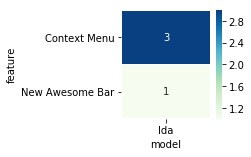

In [87]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (2,2)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(ax=ax, data=df_t40, linewidths=.3, annot=True, cmap='GnBu')

### Recovery Effort Index (REI)

In [88]:
orc_vol_only_precision = 42.66
def calculate_rei(row):
    if row['precision'] > 0:
        return orc_vol_only_precision/row['precision']
    return 0

In [89]:
retrieved_traces_df['rei'] = retrieved_traces_df.apply(lambda row : calculate_rei(row), axis=1)
retrieved_traces_df[['top','model','precision','recall','rei']].groupby('model').rei.mean()

model
bm25           2.067862
lda            2.194396
lsi            0.908820
wordvector    11.519171
Name: rei, dtype: float64

### Goodness Scale

In [90]:
aux_functions.calculate_goodness(evals_df_2_1)

,model,precision,recall,goodness
0,bm25,13.65,29.41,-
1,lsi,28.43,48.63,-
2,lda,13.29,34.86,-
3,wordvector,3.46,13.47,-


### Delete Variables

## Volunteers Only Strategy

In [ ]:
vol_strat_runner = tc_br_strat_runner.TC_BR_Vol_Strat_Runner()
vol_strat_runner.execute()

evaluator_4 = vol_strat_runner.get_evaluator() 
evals_df_4 = vol_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_4.head()

In [ ]:
aux_functions.highlight_df(evals_df_4[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

In [ ]:
evaluator_4.plot_evaluations_3(evals_df_4, title='BR-TC Traceability Recovery - Volunteers-Only Strategy')

In [ ]:
evaluator_4.plot_evaluations_4(evals_df_4)

In [ ]:
evaluator_4.plot_evaluations_5(evals_df_4)

### Oracle True Traces

In [ ]:
oracle_true_traces_vol = aux_functions.get_oracle_true_positives(vol_strat_runner)
print('len(oracle_true_traces_inter): {}'.format(len(oracle_true_traces_vol)))

#### Wrong Traces Exploration

In [ ]:
sample_wrong_traces = set(list(oracle_true_traces_vol - oracle_true_traces_inter)[0:5])
sample_wrong_traces

In [ ]:
aux_functions.detail_features_tc_br(sample_wrong_traces, testcases, bugreports)

In [ ]:
#aux_functions.highlight_ranking_tc_br([br for tc,br in sample_wrong_traces], exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix(), top_value=40)
aux_functions.highlight_ranking_tc_br([1306639], exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix(), top_value=40)

### Delete Variables

## Union Strategy

In [ ]:
exp_vol_union_strat_runner = tc_br_strat_runner.TC_BR_Exp_Vol_Union_Strat_Runner()
exp_vol_union_strat_runner.execute()

evaluator_1 = exp_vol_union_strat_runner.get_evaluator() 
evals_df_1 = exp_vol_union_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_1.head()

### Plots

In [ ]:
evaluator_1.plot_evaluations_3(evals_df_1, title='BR-TC Traceability Recovery - Exp-Vol Union Strategy')

In [ ]:
evaluator_1.plot_evaluations_4(evals_df_1)

In [ ]:
evaluator_1.plot_evaluations_5(evals_df_1)

### Delete Variables

## Expert Only Strategy

In [ ]:
exp_strat_runner = tc_br_strat_runner.TC_BR_Exp_Strat_Runner()
exp_strat_runner.execute()

evaluator_3 = exp_strat_runner.get_evaluator() 
evals_df_3 = exp_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_3.head()

### Plots

In [ ]:
evaluator_3.plot_evaluations_3(evals_df_3, title='BR-TC Traceability Recovery - Expert-Only Strategy')

In [ ]:
evaluator_3.plot_evaluations_4(evals_df_3)

In [ ]:
evaluator_3.plot_evaluations_5(evals_df_3)

### Delete Variables